In [7]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import io
import numpy as np

In [8]:
# URL of the FastAPI endpoint
url = "http://localhost:8000/actions/inference"

In [9]:
# Path to the test image
image_path = "./test_image.png"

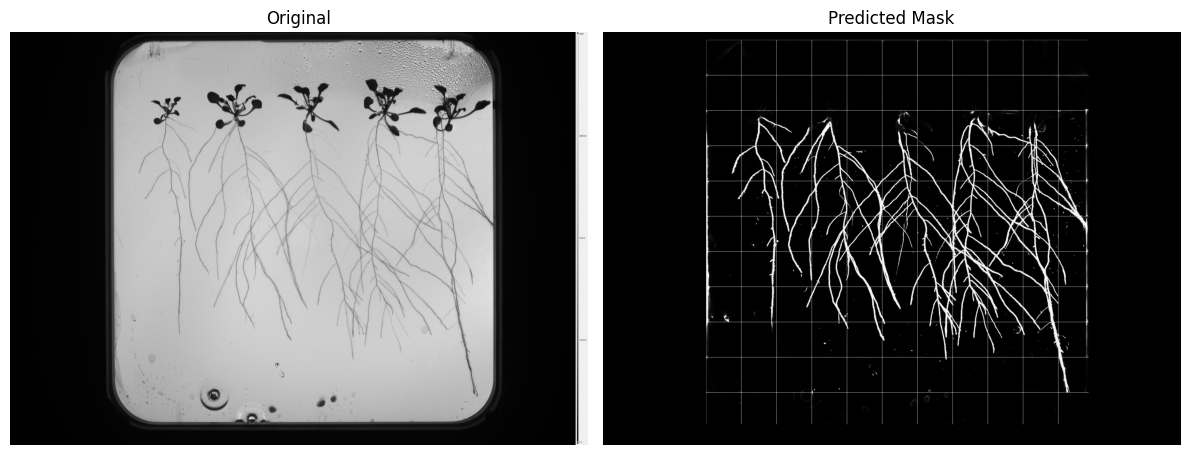

In [10]:
with open(image_path, "rb") as f:
    r = requests.post(url, files={"img": f})

# Check content-type so we don't write JSON to .jpg
ct = r.headers.get("content-type", "")
if r.status_code == 200 and ct.startswith("image/"):
    mask_path = "received_mask.png"
    with open(mask_path, "wb") as out:
        out.write(r.content)

    # display
    orig = Image.open(image_path)
    mask = Image.open(mask_path)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(orig)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(np.array(mask)*255, cmap="gray")
    plt.title("Predicted Mask")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

else:
    # if FastAPI raised HTTPException, it's JSON here
    print("Error:", r.json().get("detail", r.text))